In [20]:
# Imports
from math import sin, cos, tan, sqrt, pi
from scipy.integrate import quad
from scipy.linalg import eigh
import numpy.linalg
from numpy import *
eps = finfo(float64).eps
import numpy as np
import matplotlib.pyplot as plt
import bisect

In [21]:
# Parameters
HUBBLE_CONSTANT = 70
Universe_age = 13.8 #Gyr
seconds_in_year = 31536000
# Scale Factor
alpha = np.linspace(0,1,1001)

In [22]:
# Functions
def friedmann_equation_integrand(u,w,m,r,d,k):
 equation_of_state = w
 mass_factor = m/u
 radiation_factor = r/(u**2)
 dark_energy_factor = d/(u**(1+3*equation_of_state))
 curvature_factor = k
 integrand = 1/((mass_factor+radiation_factor+dark_energy_factor+curvature_factor)**(1/2))
 return integrand

In [23]:
# Calculations
HUBBLE_CONSTANT_SI = HUBBLE_CONSTANT / (3.086e19)
HUBBLE_CONSTANT_HIGHER = (HUBBLE_CONSTANT + 5) / (3.086e19)
HUBBLE_CONSTANT_LOWER  = (HUBBLE_CONSTANT - 5) / (3.086e19)

inverse_hubble_constant = 1 / HUBBLE_CONSTANT_SI
inverse_hubble_constant_higher = 1 / HUBBLE_CONSTANT_HIGHER
inverse_hubble_constant_lower  = 1 / HUBBLE_CONSTANT_LOWER

In [24]:
# ---------- Models ----------

def integrate_model(w, m, r, d, k, inv_H0):
    vals = []
    for a in alpha:
        if a == 0:
            vals.append(0)
        else:
            val = quad(friedmann_equation_integrand, 0, a,
                       args=(w, m, r, d, k))[0] * inv_H0 / seconds_in_year / 1e9
            vals.append(val)
    return vals

In [25]:
# Matter only
time_mass = integrate_model(-1, 1, 0, 0, 0, inverse_hubble_constant)
# LCDM
time_LCDM1 = integrate_model(-1, 0.3, 0, 0.7, 0, inverse_hubble_constant)
# w = -1.2
time_LCDM2 = integrate_model(-1.2, 0.3, 0, 0.7, 0, inverse_hubble_constant)
# w = -0.8
time_LCDM3 = integrate_model(-0.8, 0.3, 0, 0.7, 0, inverse_hubble_constant)
# H0 higher / lower
time_high  = integrate_model(-1, 0.3, 0, 0.7, 0, inverse_hubble_constant_higher)
time_low   = integrate_model(-1, 0.3, 0, 0.7, 0, inverse_hubble_constant_lower)

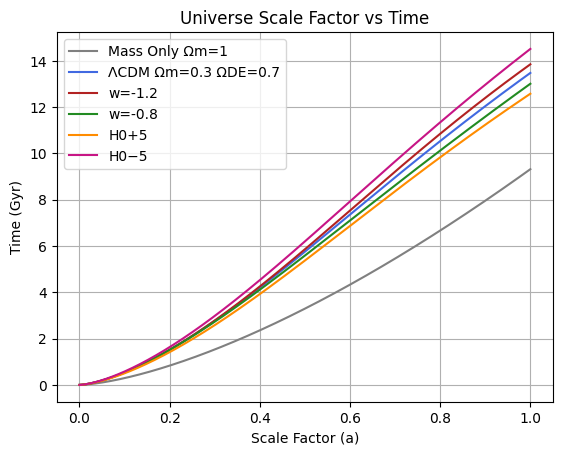

In [26]:
# Plotting
plt.plot(alpha, time_mass, color='gray', label='Mass Only Ωm=1')
plt.plot(alpha, time_LCDM1, color='royalblue', label='ΛCDM Ωm=0.3 ΩDE=0.7')
plt.plot(alpha, time_LCDM2, color='firebrick', label='w=-1.2')
plt.plot(alpha, time_LCDM3, color='forestgreen', label='w=-0.8')
plt.plot(alpha, time_high, color='darkorange', label='H0+5')
plt.plot(alpha, time_low, color='mediumvioletred', label='H0−5')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Time (Gyr)')
plt.title('Universe Scale Factor vs Time')
plt.grid()
plt.legend()
plt.show(block=False)

In [3]:
#Problem set 4
from scipy import integrate

def fries(z):
    return (67*(0.3*(1+z)**3 + 0.7)**(1/2))**-1

ang_dia_dist = integrate.quad(fries, 0, 1100)

print("Angular Diameter Distance =", (3*10**5/1101)*ang_dia_dist[0])


Angular Diameter Distance = 12.993734847567076
